In [1]:
# Import required libraries and dependencies
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Visualization
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

In [5]:
df_market_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, bitcoin to digibyte
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price_change_percentage_24h   41 non-null     float64
 1   price_change_percentage_7d    41 non-null     float64
 2   price_change_percentage_14d   41 non-null     float64
 3   price_change_percentage_30d   41 non-null     float64
 4   price_change_percentage_60d   41 non-null     float64
 5   price_change_percentage_200d  41 non-null     float64
 6   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7)
memory usage: 2.6+ KB


In [6]:
# No imputation needed
# No encoding needed

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_market_data)

# predict/transform
scaled_data = scaler.transform(df_market_data)

In [8]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [9]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data

df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
1,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
2,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
3,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
4,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [10]:
# Set the coin_id column as index
df_market_data.reset_index(inplace=True)
df_scaled.set_index(df_market_data.coin_id, inplace=True)

# Display sample data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


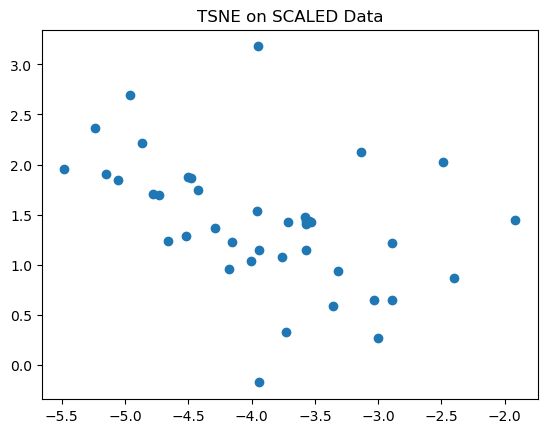

In [11]:
# Can this even be clustered?
tsne = TSNE()
df_tsne1 = pd.DataFrame(tsne.fit_transform(df_scaled))

# Plot the clusters
plt.scatter(df_tsne1[0], df_tsne1[1])
plt.title("TSNE on SCALED Data")
plt.show()

In [12]:
# TSNE not very reliable due to low sample size

---

### Find the Best Value for k Using the Original Data.

In [13]:
# Unsupervised clustering on scaled data
X = df_scaled

# Create a list with the number of k-values from 2 to 11
k = list(range(2,11))

In [56]:
# Create an empty list to store the inertia values
inertia = []
silhouettes = []
variance_ratio_criteria = []

# Create a for loop to compute the inertia with each possible value of k
for i in k:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)

    # 2. Fit the model to the data using `df_market_data_scaled`
    k_model.fit(X)
    preds = k_model.predict(X)

    # 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

    # Generate additional metrics
    score = silhouette_score(X, preds)
    silhouettes.append(score)

    cha = calinski_harabasz_score(X, preds)
    variance_ratio_criteria.append(cha)

    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [57]:
# Create a dictionary with the data to plot the Elbow curve
scaled_elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "variance_ratio_criteria": variance_ratio_criteria}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_scaled = pd.DataFrame(scaled_elbow_data)

df_elbow_scaled

,k,inertia,silhouette_score,variance_ratio_criteria
0,2,212.123342,0.690885,13.766470
1,3,165.136752,0.260810,14.021117
2,4,79.022435,0.314482,32.459853
3,5,66.413051,0.323913,29.892958
4,6,61.634088,0.251616,25.595599
5,7,46.074467,0.258868,29.631263
6,8,43.392694,0.252185,26.466078
7,9,32.913223,0.260185,30.879599
8,10,30.469111,0.168099,29.000071


In [58]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
scaled_elbow_plot = df_elbow_scaled.hvplot.line(x="k", y="inertia", title="Scaled Data Elbow Curve", xticks=k)
scaled_elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is 4, based off of the fact that inertia suddenly starts to level off at that point, as seen in both the graph and in the dataframe. K = 4 also has the highest silhouette_score and variance_ratio_criterion, indicating that data points are more spread out between clusters.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [60]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [61]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)

KMeans(n_clusters=4, random_state=1)

In [62]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = model.predict(df_scaled)

# Print the resulting array of cluster values.
print(predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [63]:
# Create a copy of the DataFrame
scaled_df2 = df_scaled.copy()

In [64]:
# Add a new column to the DataFrame with the predicted clusters
scaled_df2["preds"] = predictions

# Display sample data
scaled_df2.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,preds
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [106]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scaled_cluster_plot = scaled_df2.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    hover_cols=["coin_id"],
    color="preds",
    title="Scaled Clustering",
    size=30
)
scaled_cluster_plot

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,preds,coin_id)

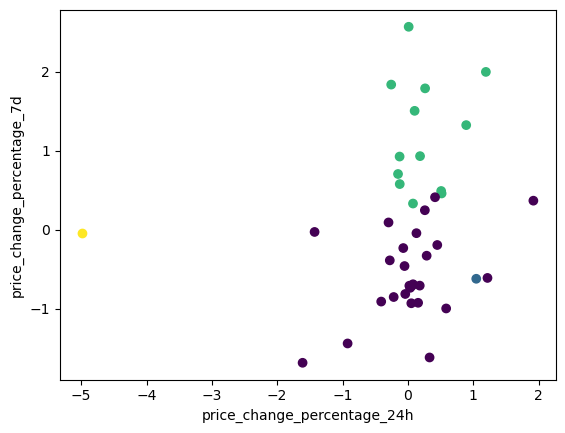

In [66]:
# Alternate scatter plot with easier to define clusters

plt.scatter(scaled_df2.price_change_percentage_24h, scaled_df2.price_change_percentage_7d, c=scaled_df2.preds)
plt.xlabel("price_change_percentage_24h")
plt.ylabel("price_change_percentage_7d")
plt.show()

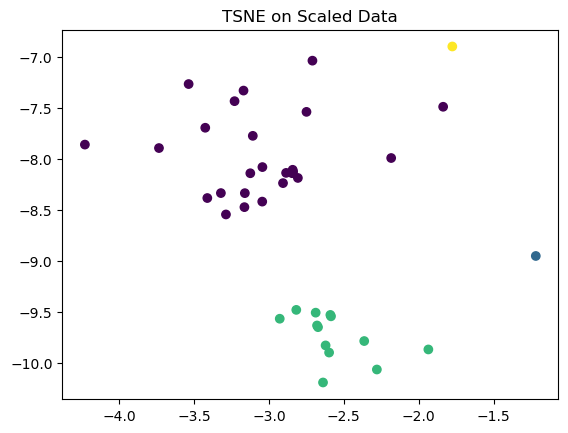

In [68]:
# Visualization of dimensionality reduction
tsne = TSNE()
df_tsne2 = pd.DataFrame(tsne.fit_transform(scaled_df2))

# Plot the clusters
plt.scatter(df_tsne2[0], df_tsne2[1], c=scaled_df2["preds"])
plt.title("TSNE on Scaled Data")
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [27]:
# Evaluate collinearity
corrs = df_scaled.corr()
corrs

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
price_change_percentage_24h,1.000000,0.169659,0.279682,0.292563,0.136974,-0.541190,-0.750630
price_change_percentage_7d,0.169659,1.000000,0.538294,0.056899,-0.145099,-0.052533,-0.038424
price_change_percentage_14d,0.279682,0.538294,1.000000,0.658040,0.376108,-0.039086,-0.116632
price_change_percentage_30d,0.292563,0.056899,0.658040,1.000000,0.745248,0.324777,0.016078
price_change_percentage_60d,0.136974,-0.145099,0.376108,0.745248,1.000000,0.499102,0.211242
price_change_percentage_200d,-0.541190,-0.052533,-0.039086,0.324777,0.499102,1.000000,0.879873
price_change_percentage_1y,-0.750630,-0.038424,-0.116632,0.016078,0.211242,0.879873,1.000000


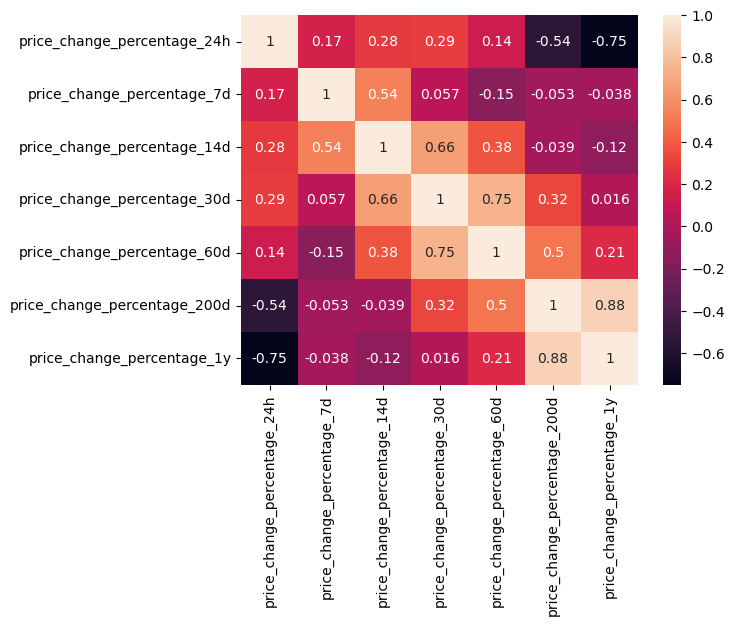

In [28]:
sns.heatmap(corrs, annot=True)
plt.show()

In [70]:
# Create a new DataFrame with the PCA data.

n_components = len(df_scaled.columns)
pca = PCA(n_components = n_components)

pca_data = pca.fit_transform(df_scaled)
df_pca_full = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])

# Copy the crypto names from the original data
# Set the coinid column as index
df_pca_full.index = df_scaled.index

# Display sample data
df_pca_full.head()

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7
coin_id,,,,,,,
bitcoin,-0.600667,0.842760,0.461595,-0.109151,-0.033786,-0.225703,0.006595
ethereum,-0.458261,0.458466,0.952877,0.095100,0.014588,0.034158,0.109593
tether,-0.433070,-0.168126,-0.641752,-0.470282,0.115300,-0.127710,-0.086857
ripple,-0.471835,-0.222660,-0.479053,-0.737473,-0.148641,-0.273472,0.134870
bitcoin-cash,-1.157800,2.041209,1.859715,0.236479,-0.191787,-0.411513,-0.070411


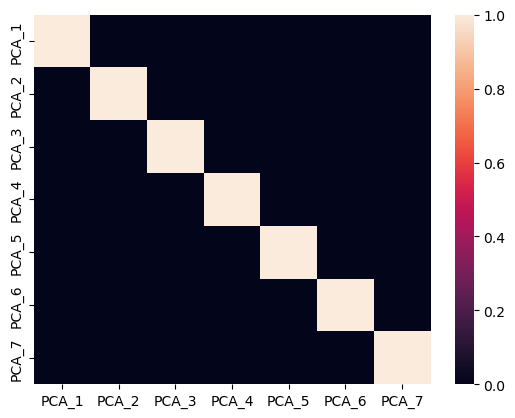

In [71]:
# Ensure collinearity has been resolved
corrs = df_pca_full.corr()
sns.heatmap(corrs)
plt.show()

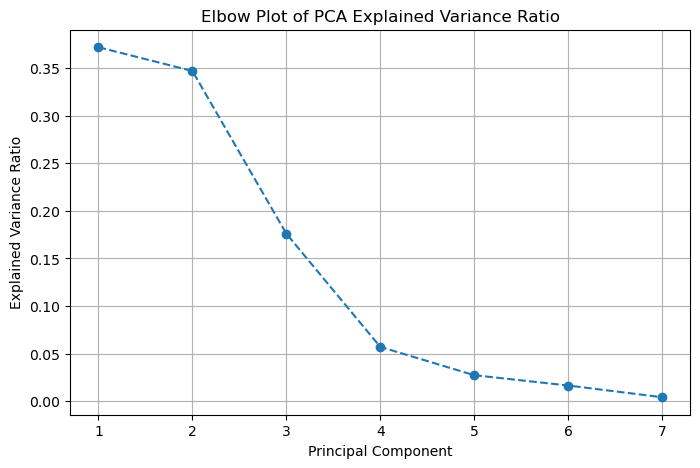

In [73]:
# Determine if dimensionality reduction is necessary

explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df_pca_evr = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df_pca_evr['Principal Component'], df_pca_evr['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [74]:
explained_variance_ratio

array([0.3719856 , 0.34700813, 0.17603793, 0.05705673, 0.02729754,
       0.0164632 , 0.00415086])

In [75]:
sum(explained_variance_ratio[0:4])

0.9520883911037916

In [80]:
# The first 4 principal components make up over 95% of the data, so they are most important.
#############################################################

In [77]:
# Create a PCA model instance and set `n_components=3`.
n_components = 3
pca = PCA(n_components = n_components)

In [82]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_scaled)
df_pca_3 = pd.DataFrame(pca_data, columns=["PCA_" + str(x) for x in range(1, n_components + 1)])
df_pca_3.index = df_scaled.index

# View the first five rows of the DataFrame. 
df_pca_3.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


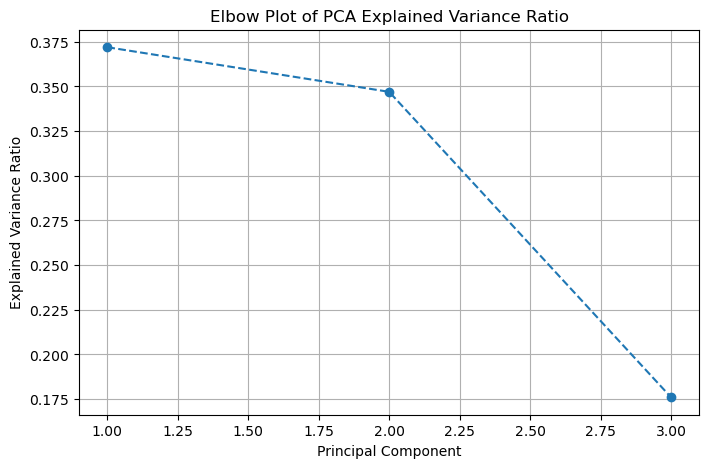

In [79]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.

# Assume pca.explained_variance_ratio_ is already computed
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame from the explained variance ratio
df2 = pd.DataFrame({
    'Principal Component': range(1, n_components + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Plot the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(df2['Principal Component'], df2['Explained Variance Ratio'], marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Elbow Plot of PCA Explained Variance Ratio')
plt.grid(True)
plt.show()

In [35]:
explained_variance_ratio

array([0.3719856 , 0.34700813, 0.17603793])

In [36]:
sum(explained_variance_ratio[0:3])

0.8950316570309841

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The three principal components are responsible for 89.5% of the variance in the data.

---

### Find the Best Value for k Using the PCA Data

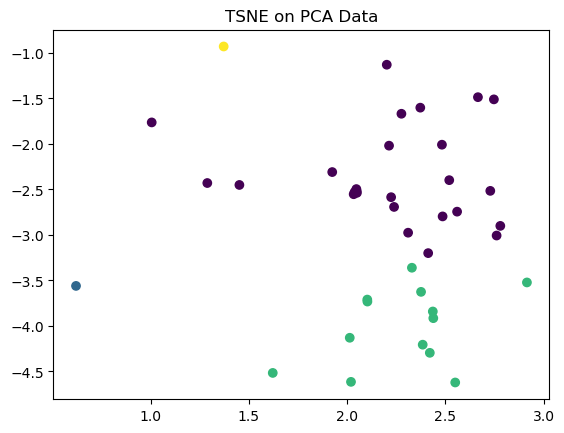

In [83]:
# Visualization of dimensionality reduction

tsne = TSNE()
df_tsne2 = pd.DataFrame(tsne.fit_transform(df_pca_3))

plt.scatter(df_tsne2[0], df_tsne2[1], c=scaled_df2["preds"])
plt.title("TSNE on PCA Data")
plt.show()

In [37]:
# Create a list with the number of k-values from 1 to 11
k = list(range(2,11))

In [86]:
X = df_pca_3

# Create an empty list to store the inertia values
inertia = []
silhouettes = []
variance_ratio_criteria = []

# Create a for loop to compute the inertia with each possible value of k

for i in k:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)

    # 2. Fit the model to the data using `df_market_data_pca`
    k_model.fit(X)
    preds = k_model.predict(X)

    # 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

    # Generate additional metrics
    score = silhouette_score(X, preds)
    silhouettes.append(score)

    cha = calinski_harabasz_score(X, preds)
    variance_ratio_criteria.append(cha)

    print(f"Finished {i} out of {max(k)}")

Finished 2 out of 10
Finished 3 out of 10
Finished 4 out of 10
Finished 5 out of 10
Finished 6 out of 10
Finished 7 out of 10
Finished 8 out of 10
Finished 9 out of 10
Finished 10 out of 10


In [87]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {"k": k, "inertia": inertia, "silhouette_score": silhouettes, "variance_ratio_criteria": variance_ratio_criteria}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(pca_elbow_data)

df_elbow_pca

,k,inertia,silhouette_score,variance_ratio_criteria
0,2,182.339530,0.728406,15.941950
1,3,135.442408,0.356130,17.034560
2,4,49.665497,0.420800,51.455694
3,5,38.672582,0.405662,50.780512
4,6,34.507577,0.334511,45.107936
5,7,23.728365,0.375378,55.678472
6,8,18.574523,0.316385,60.481348
7,9,15.572672,0.323751,61.980734
8,10,11.407667,0.350621,74.116423


In [88]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
pca_elbow_plot = df_elbow_pca.hvplot.line(x="k", y="inertia", title="PCA Elbow Curve", xticks=k)
pca_elbow_plot

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** By metrics, the best value for k is still 4. This is the point where inertia starts to level off, and the clusters are as close their centroids as they can be based on silhouette_score and variance_ratio_criteria.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** This is the same conclusion we drew with the original data. Perhaps there can only be so much variance with such a limited dataset (41 rows).

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [93]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [94]:
# Fit the K-Means model using the PCA data
X = df_pca_3
model.fit(X)

KMeans(n_clusters=4, random_state=1)

In [95]:
# Predict the clusters to group the cryptocurrencies using the PCA data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [99]:
# Create a copy of the DataFrame with the PCA data
df_pca = df_pca_3.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca["clusters"] = preds

# Display sample data
df_pca.head()

,PCA_1,PCA_2,PCA_3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [107]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

pca_cluster_plot = df_pca2.hvplot.scatter(
    x="PCA_1", 
    y="PCA_2", 
    hover_cols=["coin_id"],
    color="clusters",
    title="PCA Clustering",
    size=30
)
pca_cluster_plot

:Scatter   [PCA_1]   (PCA_2,clusters,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [110]:
# Composite plot to contrast the Elbow curves
(scaled_elbow_plot + pca_elbow_plot).cols(1)

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [109]:
# Composite plot to contrast the clusters
(scaled_cluster_plot + pca_cluster_plot).cols(1)

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,preds,coin_id)
   .Scatter.II :Scatter   [PCA_1]   (PCA_2,clusters,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features clusters the data points more tightly, meaning that there is less variation between data points. The top 3 principal components are responsible for 85% of the variance in this data, and visualizing those shows more clearly the two outlier cryptocurrency coin ids which might be skewing the overall data aggregations.